In [2]:
!pip install --user --upgrade apafib

In [93]:
!pip install -U yellowbrick

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 5.2 MB/s eta 0:00:003.5 MB/s eta 0:00:01


In [94]:
from apafib import load_MITBIH
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score

In [14]:
df = load_MITBIH()

X = df.drop(columns = ['target'])
y = df[['target']]

df.head()


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,target
0,0.988684,0.225644,0.005137,0.067679,0.045216,0.052735,0.078290,0.078020,0.106516,0.131787,...,-0.000027,0.000037,-0.000035,0.000024,-0.000009,-0.000004,0.000013,-0.000017,1.493154e-05,Normal
1,0.988463,0.255621,0.014753,0.135870,0.149761,0.145114,0.260982,0.331085,0.323523,0.311399,...,-0.000062,0.000172,-0.000210,0.000184,-0.000115,0.000032,0.000040,-0.000084,9.528151e-05,ArrS
2,0.975710,0.541291,0.056431,0.001236,0.046895,0.023730,0.047825,0.033864,0.042665,0.038015,...,-0.000408,-0.000067,0.000417,-0.000612,0.000628,-0.000479,0.000233,0.000025,-2.191219e-04,ArrS
3,0.988539,0.640719,0.211277,0.153709,0.143665,0.113944,0.136569,0.111482,0.123713,0.099498,...,-0.000011,0.000007,-0.000002,-0.000002,0.000005,-0.000006,0.000005,-0.000003,5.437810e-07,Normal
4,0.718637,0.413863,0.123311,0.058860,0.055222,0.043426,0.060662,0.056730,0.079994,0.107037,...,0.000003,-0.000017,0.000023,-0.000021,0.000015,-0.000006,-0.000003,0.000008,-1.048218e-05,Normal


In [15]:
df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
90        0
91        0
92        0
93        0
target    0
Length: 95, dtype: int64

In [16]:
sum(df.isna().sum())

0

In [17]:
clases = df['target'].unique()
print(clases)

['Normal' 'ArrS' 'ArrQ' 'ArrV' 'ArrF']


# Apartado A

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

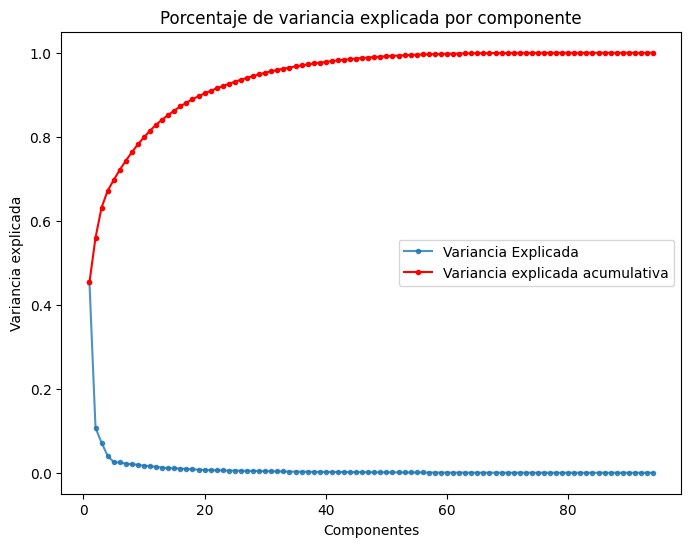

In [30]:
pca = PCA().fit(X_train);
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

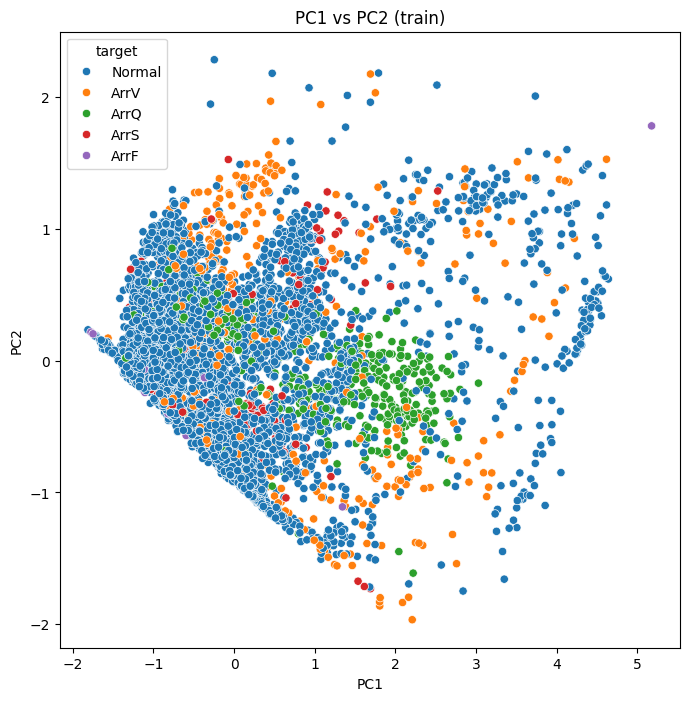

In [44]:
X_trans = pca.transform(X_train)

plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:, 0], y=X_trans[:, 1], hue=y_train.iloc[:, 0])
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PC1 vs PC2 (train)')
plt.legend(title='target')
plt.show()



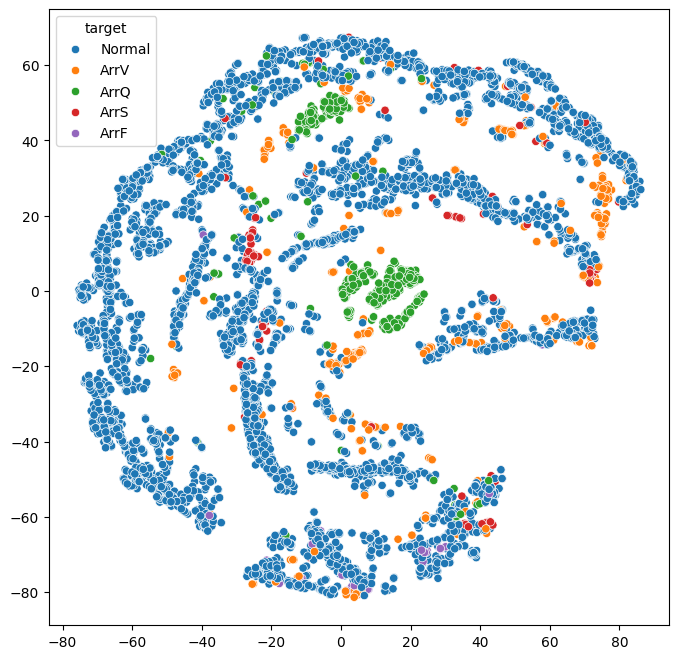

In [48]:
X_trans = TSNE(n_components=2, perplexity=40, max_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train.iloc[:, 0]);

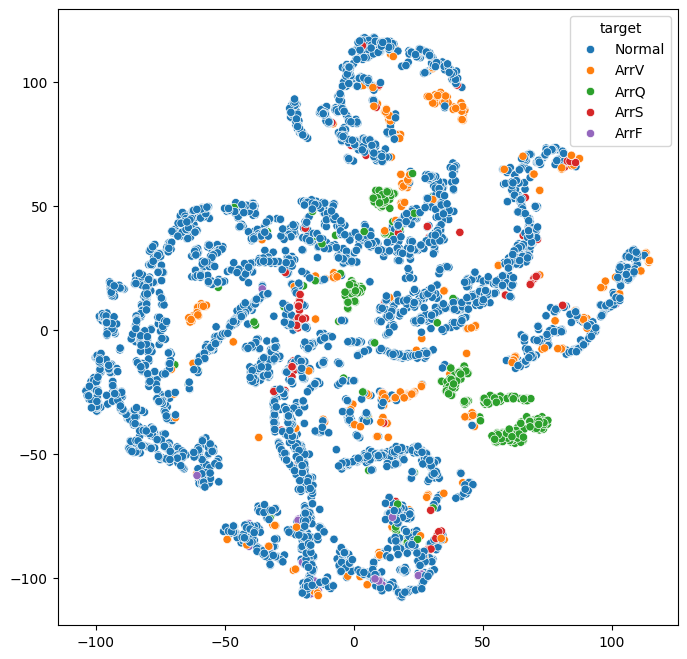

In [49]:
X_trans = TSNE(n_components=2, perplexity=20, max_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train.iloc[:, 0]);

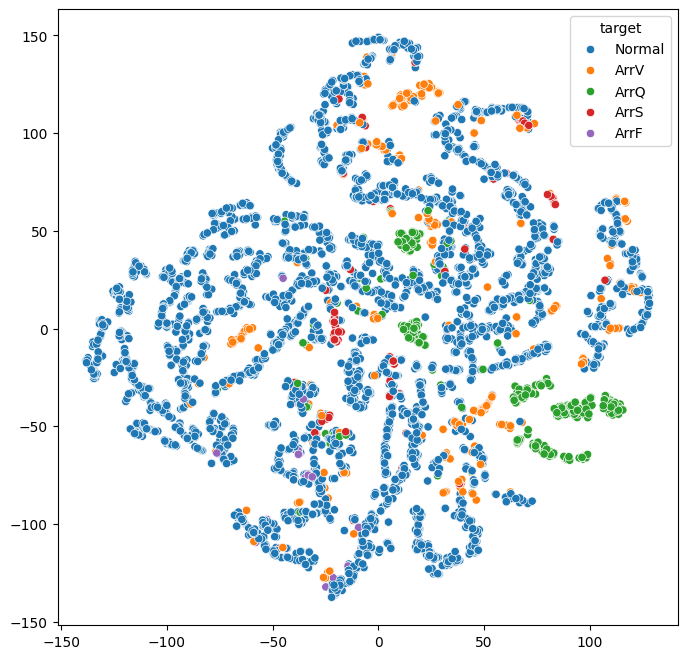

In [51]:
X_trans = TSNE(n_components=2, perplexity=10, max_iter=2000, init='pca').fit_transform(X_train)

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train.iloc[:, 0]);

# Apartado B


In [87]:
def save_results(clf, X_test, y_test, nclf, df):
    if hasattr(clf, 'best_score_'):
        df.loc[nclf,'train XV acc'] = clf.best_score_
    else:
        df.loc[nclf,'train XV acc'] = np.nan
    df.loc[nclf,'test acc'] = accuracy_score(y_test, clf.predict(X_test))
    df.loc[nclf,'precision score (M)'] = precision_score(y_test, clf.predict(X_test), average='macro')
    df.loc[nclf,'recall score (M)'] = recall_score(y_test, clf.predict(X_test), average='macro')
    df.loc[nclf,'f1 score (M)'] = f1_score(y_test, clf.predict(X_test), average='macro')
    return df

results_df = pd.DataFrame()

In [76]:
bnb = BernoulliNB()
print(np.mean(cross_val_score(bnb,X_train,np.ravel(y_train),cv=10)))

0.602387915646749


In [77]:
bnb_model = BernoulliNB().fit(X_train, y_train)

bnb_model.best_score_ = np.mean(cross_val_score(bnb_model,X_train,np.ravel(y_train),cv=10))

In [82]:
cls = [str(v) for v in sorted(df['target'].unique())]

In [88]:
print(classification_report(np.ravel(y_test), bnb_model.predict(X_test), target_names=cls))
results_df = save_results(bnb_model, X_test, np.ravel(y_test), 'BNB (b)', results_df)

              precision    recall  f1-score   support

        ArrF       0.04      0.55      0.08        20
        ArrQ       0.26      0.76      0.39       208
        ArrS       0.00      0.00      0.00        67
        ArrV       0.14      0.24      0.18       198
      Normal       0.89      0.62      0.73      2397

    accuracy                           0.59      2890
   macro avg       0.27      0.44      0.28      2890
weighted avg       0.77      0.59      0.65      2890



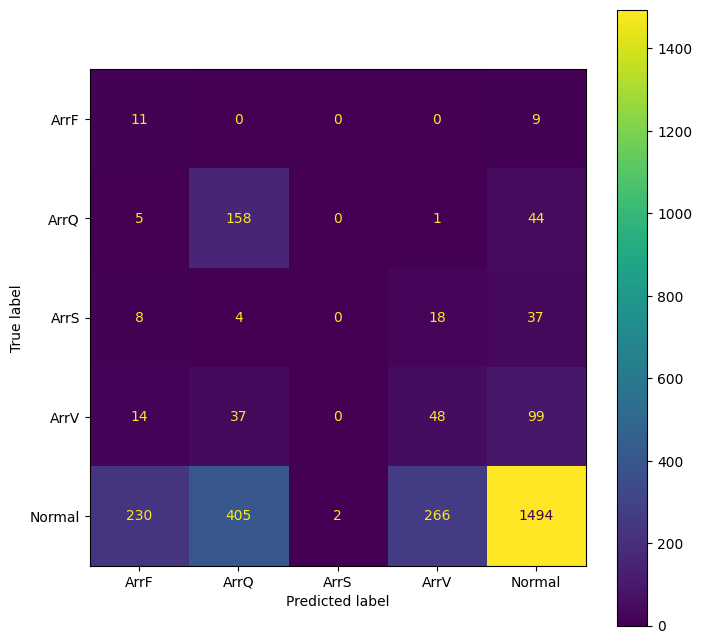

In [90]:
plt.figure(figsize=(8,8));
ConfusionMatrixDisplay.from_estimator(bnb_model, X_test,np.ravel(y_test), display_labels=cls, ax=plt.subplot());

/home/principal/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


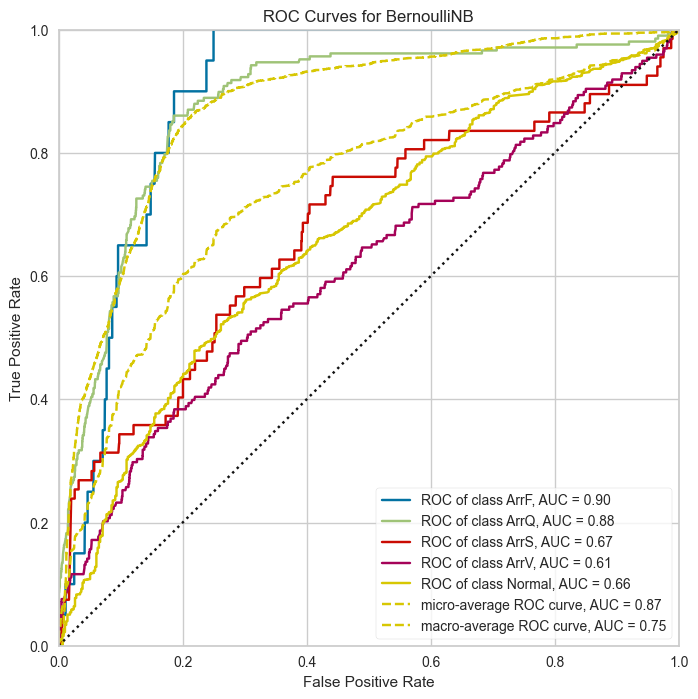

In [95]:
plt.figure(figsize=(8,8));
roc_auc(bnb_model, X_train, np.ravel(y_train), X_test, np.ravel(y_test), classes=cls);